<a href="https://colab.research.google.com/github/RuchithaKumarRK/Detecting-tomato-leaf-disease/blob/main/HiWi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import random as rn
import os  
import cv2 
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
data = '/gdrive/My Drive/Boats'

Mounted at /gdrive


In [ ]:
#import numpy
# # x is your dataset
# data = numpy.random.rand(100, 5)
# numpy.random.shuffle(data)
# training, test = data[:80,:], data[80:,:]
# print(len(training))
# print(len(test))

In [4]:
X=[]
Z=[]
IMG_SIZE=150
BUOY_DIR='/gdrive/My Drive/Boats/train/buoy'
#CRUISE_SHIP_DIR='/gdrive/My Drive/boats/cruise ship'
FERRY_BOAT_DIR='/gdrive/My Drive/Boats/train/ferry boat'
FREIGHT_BOAT_DIR='/gdrive/My Drive/Boats/train/freight boat'
GONDOLA_DIR='/gdrive/My Drive/Boats/train/gondola'
INFLATABLE_BOAT_DIR='/gdrive/My Drive/Boats/train/inflatable boat'
KAYAK_DIR='/gdrive/My Drive/Boats/train/kayak'
#PAPER_BOAT_DIR='/gdrive/My Drive/boats/paper boat'
SAILBOAT_DIR='/gdrive/My Drive/Boats/train/sailboat'

In [5]:
def check_files_extension(DIR):
    result_list = list()
    for img in os.listdir(DIR):
        filename, file_extension = os.path.splitext(img)
        result_list.append(file_extension)
    myset = set(result_list)
    print(myset)
    
check_files_extension(BUOY_DIR)
check_files_extension(FERRY_BOAT_DIR)
check_files_extension(FREIGHT_BOAT_DIR)
check_files_extension(GONDOLA_DIR)
check_files_extension(INFLATABLE_BOAT_DIR)
check_files_extension(KAYAK_DIR)
#check_files_extension(PAPER_BOAT_DIR)
check_files_extension(SAILBOAT_DIR)

{'.jpg'}
{'.jpg'}
{'.jpg'}
{'.jpg'}
{'.jpg'}
{'.jpg'}
{'.jpg'}


In [6]:
def is_correct_file(file_name):
    filename, file_extension = os.path.splitext(file_name)
    is_file = os.path.isfile(file_name)
    is_image = file_extension.lower() == ".jpg"
    return is_file and is_image

In [7]:
def assign_label(img,boat_type):
    return boat_type

def make_train_data(boat_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,boat_type)
        path = os.path.join(DIR,img)
        if is_correct_file(path):
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        
make_train_data('Buoy',BUOY_DIR)
print(len(X))

make_train_data('Ferry boat',FERRY_BOAT_DIR)
print(len(X))

make_train_data('Freight boat',FREIGHT_BOAT_DIR)
print(len(X))

make_train_data('Gondola',GONDOLA_DIR)
print(len(X))

make_train_data('Inflatable boat',INFLATABLE_BOAT_DIR)
print(len(X))

make_train_data('Kayak',KAYAK_DIR)
print(len(X))

make_train_data('Sailboat',SAILBOAT_DIR)
print(len(X))

100%|██████████| 14/14 [00:02<00:00,  4.93it/s]


14


100%|██████████| 64/64 [00:12<00:00,  4.94it/s]


78


100%|██████████| 23/23 [00:05<00:00,  4.58it/s]


101


100%|██████████| 193/193 [00:43<00:00,  4.45it/s]


294


100%|██████████| 17/17 [00:03<00:00,  4.92it/s]


311


100%|██████████| 195/195 [00:40<00:00,  4.82it/s]


506


100%|██████████| 378/378 [01:19<00:00,  4.75it/s]

884


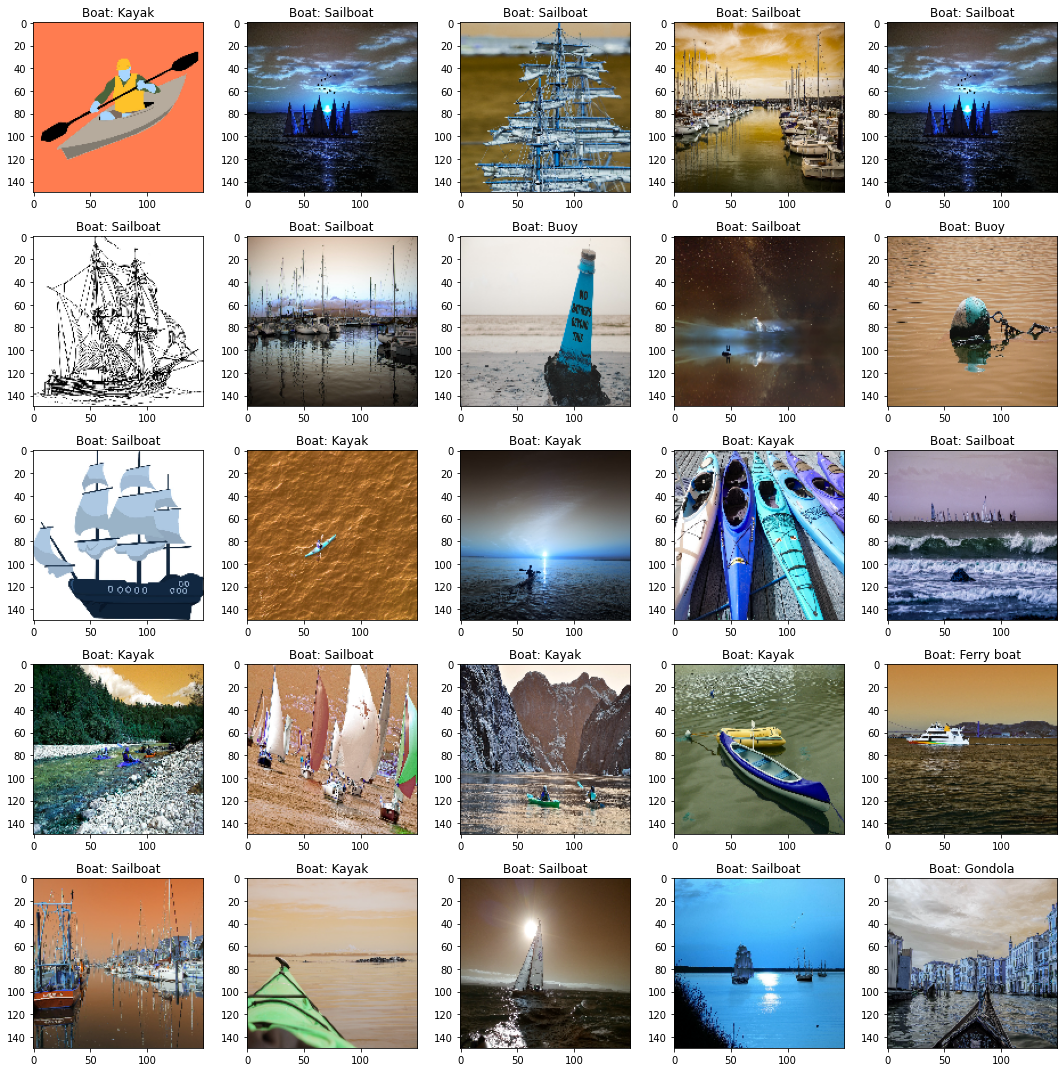

In [8]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Boat: '+Z[l])
        
plt.tight_layout()

In [9]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [10]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [11]:
x = Flatten()(inception.output)

In [12]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.05,
                                   horizontal_flip = True,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                  samplewise_center=False,  # set each sample mean to 0
                                  featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                  samplewise_std_normalization=False,  # divide each input by its std
                                  zca_whitening=False,  # apply ZCA whitening
                                  rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                  width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                  height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                  vertical_flip=False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
training_set = train_datagen.flow_from_directory('/gdrive/My Drive/Boats/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Mounted at /gdrive
Found 884 images belonging to 7 classes.


In [17]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
test_set = test_datagen.flow_from_directory('/gdrive/My Drive/Boats/val',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Mounted at /gdrive
Found 241 images belonging to 7 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
56/56 [==============================] - 183s 3s/step - loss: 4.0718 - accuracy: 0.7398 - val_loss: 2.7306 - val_accuracy: 0.7925
Epoch 2/10
56/56 [==============================] - 153s 3s/step - loss: 1.9050 - accuracy: 0.8552 - val_loss: 2.0187 - val_accuracy: 0.8340
Epoch 3/10
56/56 [==============================] - 150s 3s/step - loss: 1.1068 - accuracy: 0.8948 - val_loss: 2.2293 - val_accuracy: 0.8589
Epoch 4/10
56/56 [==============================] - 146s 3s/step - loss: 1.5548 - accuracy: 0.8824 - val_loss: 3.7215 - val_accuracy: 0.8257
Epoch 5/10
56/56 [==============================] - 146s 3s/step - loss: 1.3424 - accuracy: 0.9005 - val_loss: 2.7266 - val_accuracy: 0.8631
Epoch 6/10
56/56 [==============================] - 146s 3s/step - loss: 0.8838 - accuracy: 0.9208 - val_loss: 3.6323 - val_accuracy: 0.8589
Epoch 7/10
56/56 [==============================] - 146s 3s/step - loss: 0.8148 - accuracy: 0.9287 - val_loss: 2.6342 - val_accuracy: 0.8755
Epoch 8/10
56

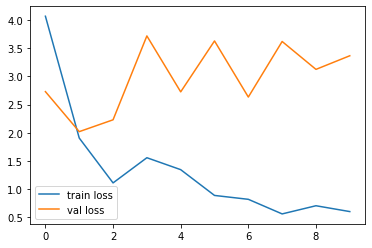

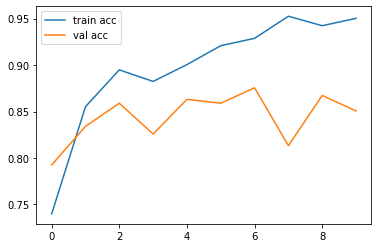

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')